In [1]:
%cd ..
from src.utils import load_data
from src.algos import *

NUM_STARTS = 10

e:\coding\essa-tsp-metaheuristics


In [2]:
df = load_data('data\TSP_29.xlsx')

In [3]:
s = SimulatedAnnealing(temp=100, alpha=.9, n_iter=1000, verbose=False)
s.solve(df)

best distance: 2668
algorithm: SIMULATED ANNEALING
n_iter: 1000
solving time: 0.334 s
history: [6659, 6534, 6195, 6030, 5899, 5616, 5492, 5238, 5218, 5196, 5158, 5160, 5130, 5105, 4969, 4843, 4819, 4698, 4549, 4353, 4289, 4182, 4061, 3937, 3911, 3775, 3775, 3757, 3703, 3622, 3598, 3561, 3531, 3460, 3411, 3389, 3361, 3298, 3228, 3217, 3022, 2962, 2942, 2914, 2870, 2850, 2796, 2754, 2752, 2731, 2709, 2672, 2668]

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14) 

best distance: 2293
algorithm: NEAREST NEIGHBOUR
solving time: 0.018 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30)
t.solve(df)

best distance: 2274
algorithm: TABU SEARCH
n_iter: 30
solving time: 3.413 s
history: [6506, 5537, 4927, 4356, 3946, 3727, 3532, 3391, 3181, 3058, 2949, 2790, 2725, 2664, 2617, 2546, 2511, 2441, 2433, 2418, 2399, 2369, 2305, 2303, 2307, 2292, 2276, 2278, 2286, 2296, 2274]

In [6]:
h = HillClimber(verbose=False, n_iter=25)
h.solve(df)

best distance: 2762
algorithm: HILL CLIMBER
n_iter: 25
solving time: 1.932 s
history: [5521, 4936, 4373, 4036, 3794, 3611, 3444, 3328, 3228, 3114, 3031, 2959, 2911, 2885, 2855, 2801, 2797, 2762]

In [7]:
a = MultistartAlgorithm()(HillClimber, df, n_starts=NUM_STARTS, only_best=True, verbose=False, n_iter=25)
a

Parallel time for HILL CLIMBER: 8.773 s


best distance: 2201
algorithm: HILL CLIMBER
n_iter: 25
solving time: 2.367 s
history: [6071, 5287, 4639, 4032, 3666, 3472, 3380, 3314, 3182, 3049, 2898, 2766, 2698, 2603, 2391, 2264, 2221, 2209, 2201]

In [8]:
b = MultistartAlgorithm()(SimulatedAnnealing, df, n_starts=NUM_STARTS, only_best=True, temp=1000, alpha=.9, n_iter=100, verbose=False)
b

Parallel time for SIMULATED ANNEALING: 0.115 s


best distance: 3724
algorithm: SIMULATED ANNEALING
n_iter: 100
solving time: 0.028 s
history: [5481, 5562, 5449, 5302, 5380, 5086, 5115, 4876, 4760, 4705, 4797, 4618, 4676, 4676, 4629, 4569, 4551, 4431, 4194, 4196, 4222, 4180, 4115, 3981, 3976, 3965, 3965, 3775, 3775, 3775, 3775, 3759, 3724, 3724]

In [9]:
c = MultistartAlgorithm()(TabuSearch, df, n_starts=NUM_STARTS, only_best=True, verbose=False, tabu_length=3 , n_iter=30)
c

Parallel time for TABU SEARCH: 9.208 s


best distance: 2100
algorithm: TABU SEARCH
n_iter: 30
solving time: 3.194 s
history: [5991, 5354, 4737, 4192, 3717, 3460, 3214, 2965, 2783, 2668, 2586, 2523, 2466, 2385, 2338, 2296, 2260, 2246, 2196, 2110, 2102, 2100, 2100, 2106, 2114, 2116, 2116, 2110, 2102, 2100, 2100]

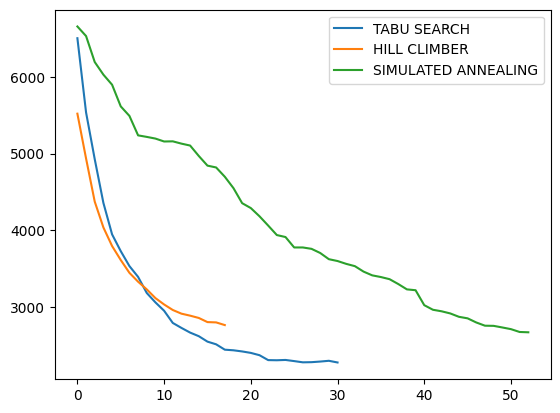

In [10]:
from matplotlib import pyplot as plt
plt.plot(t.history, label=t.NAME)
plt.plot(h.history, label=h.NAME)
plt.plot(s.history, label=s.NAME)
plt.legend()

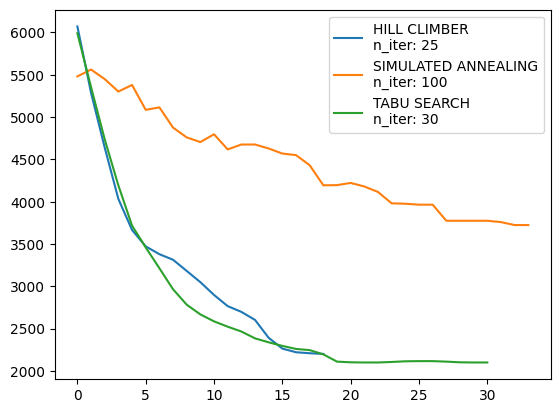

In [11]:
plt.plot(a.distance_history, label=a.algorithm)
plt.plot(b.distance_history, label=b.algorithm)
plt.plot(c.distance_history, label=c.algorithm)
plt.legend()